<a href="https://colab.research.google.com/github/highlevelcoding/Flight-Cancellation-Analysis-and-Prediction/blob/main/venky_eda_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset loaded successfully!

Dataset Preview:
   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0    7319483  Airline D            475.0      Airport 3           Airport 2   
1    4791965  Airline E            538.0      Airport 5           Airport 4   
2    2991718  Airline C            565.0      Airport 1           Airport 2   
3    4220106  Airline E            658.0      Airport 5           Airport 3   
4    2263008  Airline E            566.0      Airport 2           Airport 2   

   Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
0                         4            6      1        Type C       0.225122   
1                        12            1      6        Type B       0.060346   
2                        17            3      9        Type C       0.093920   
3                         1            1      8        Type B       0.656750   
4                        19            7     12        Type E       0.505211  

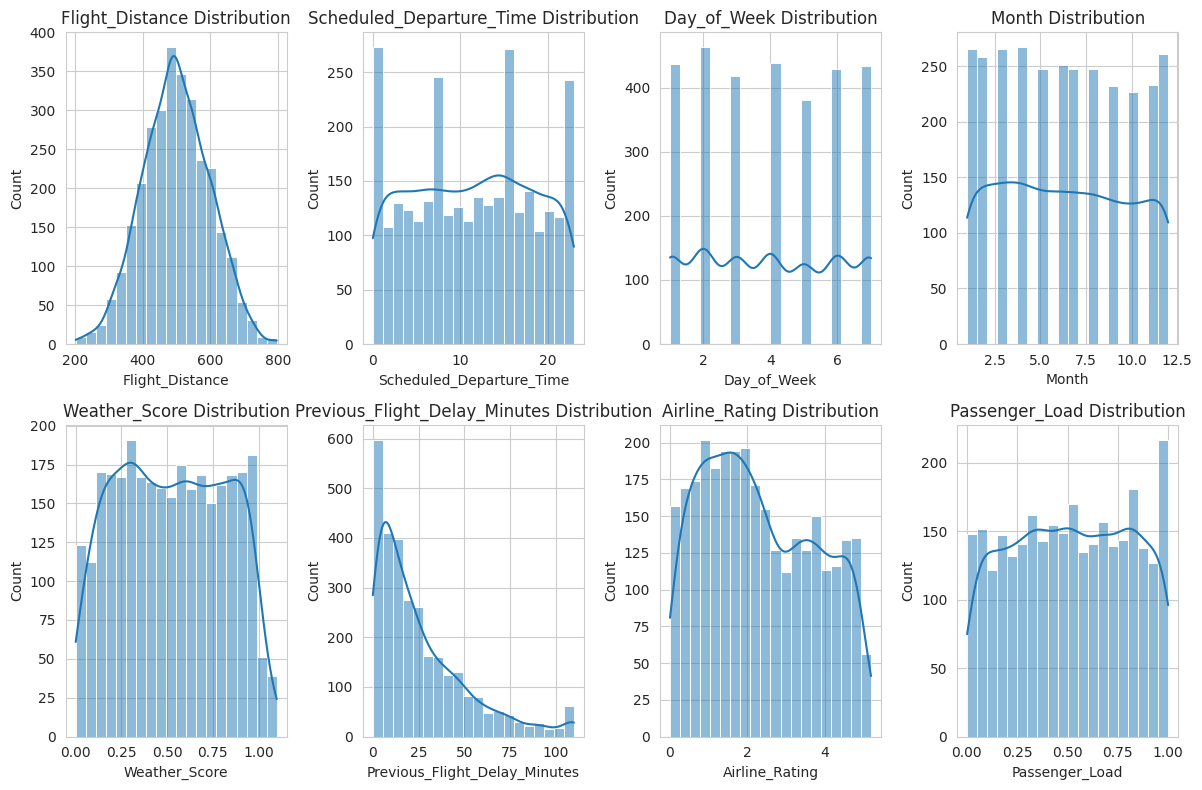

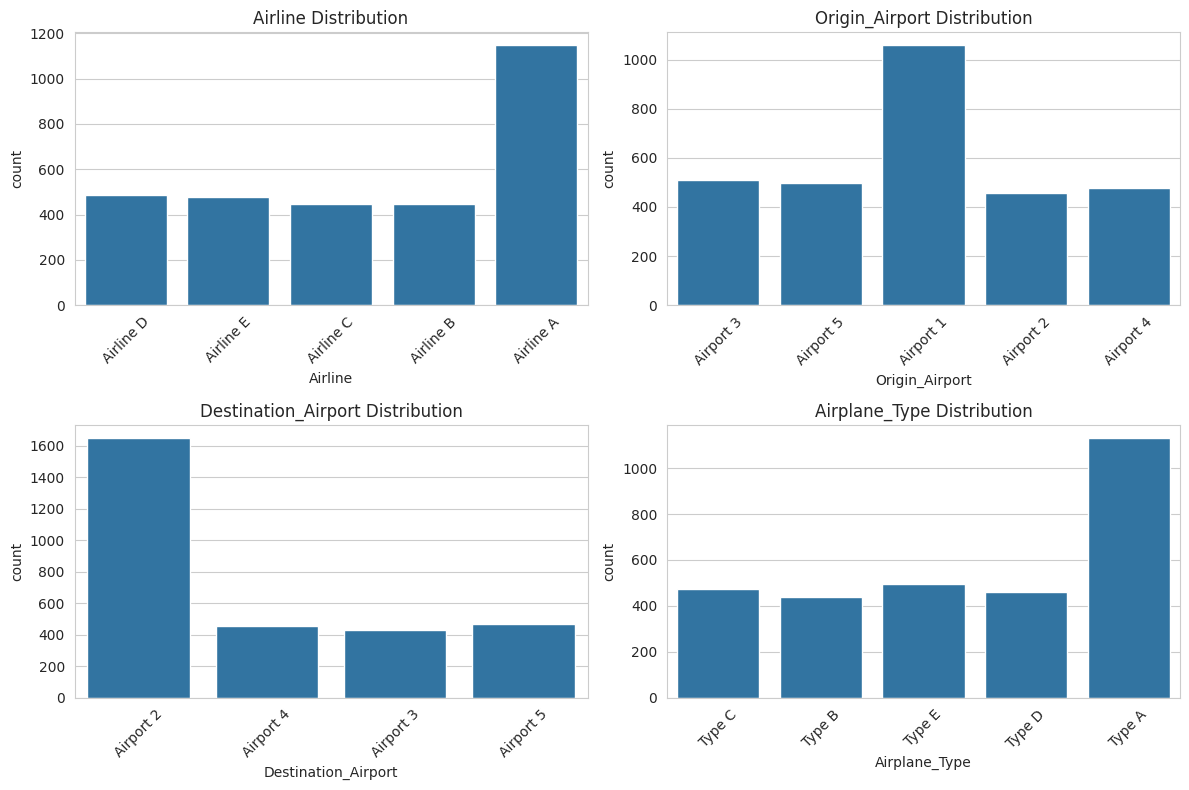

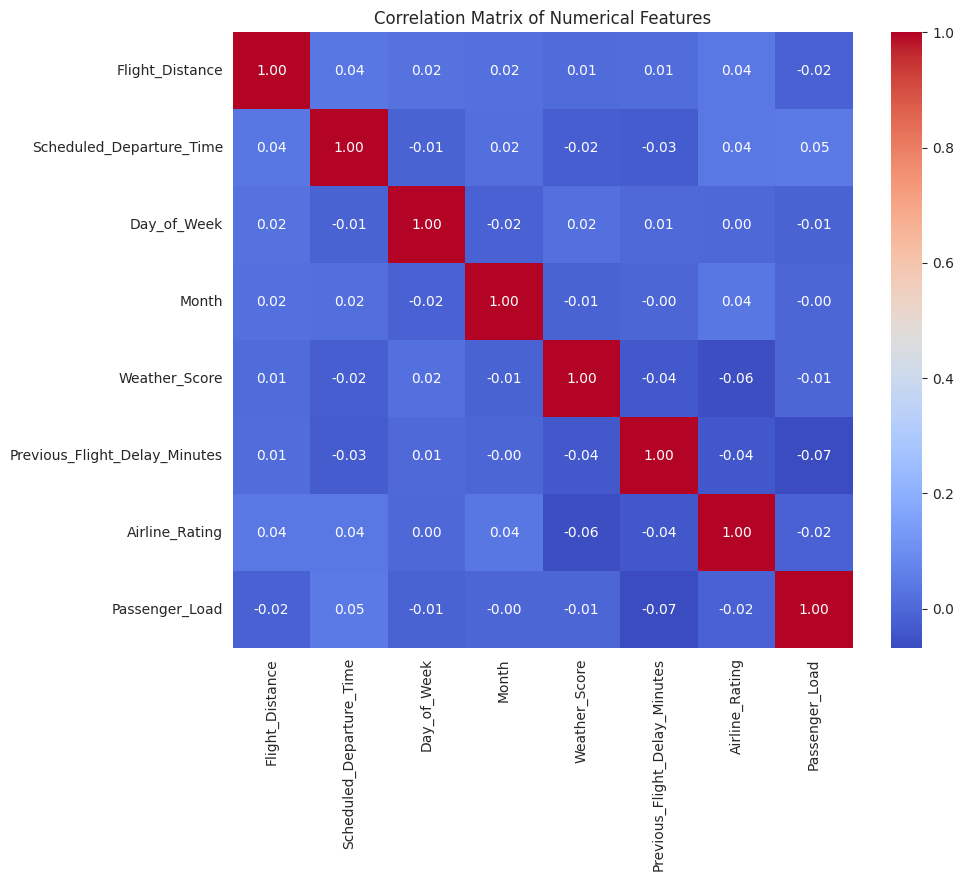

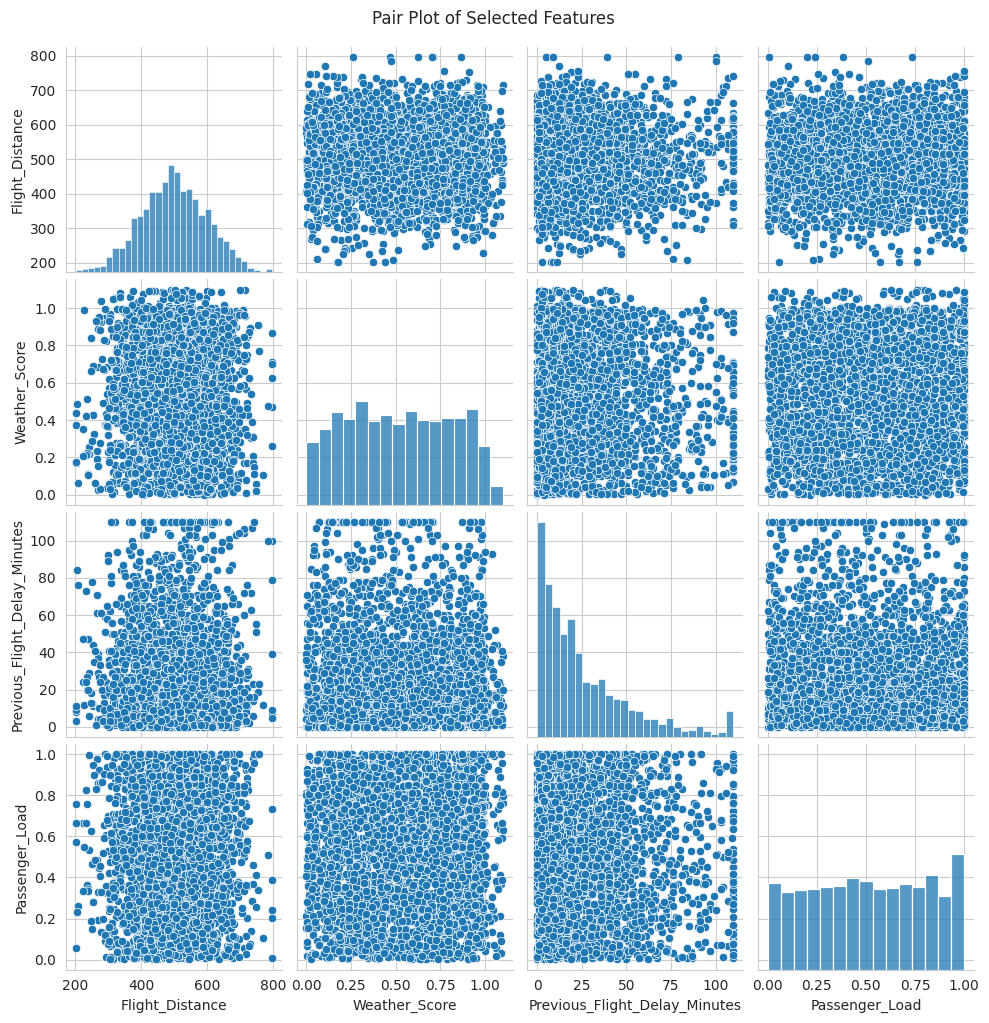

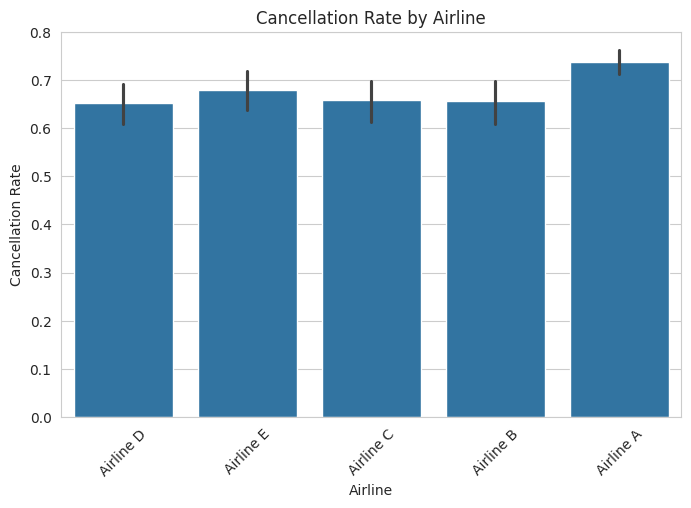

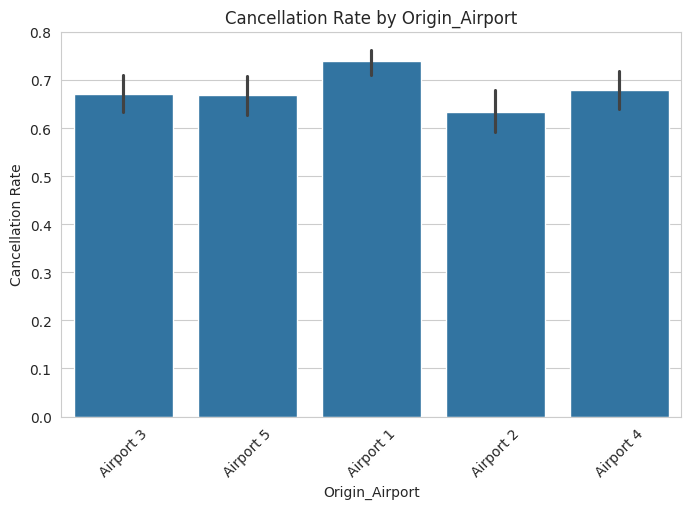

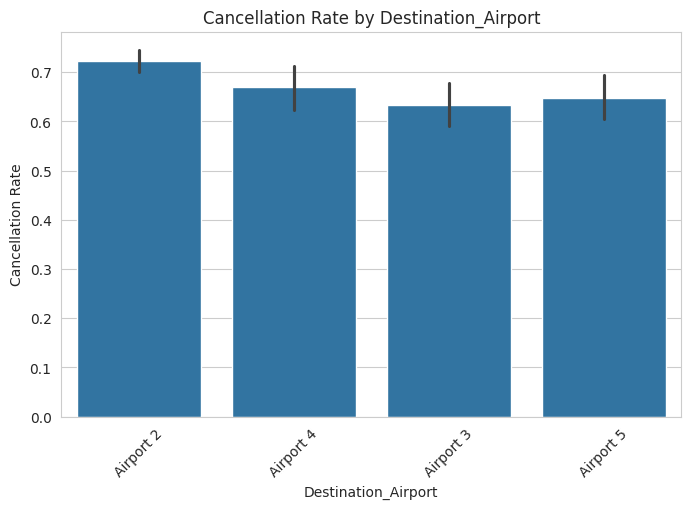

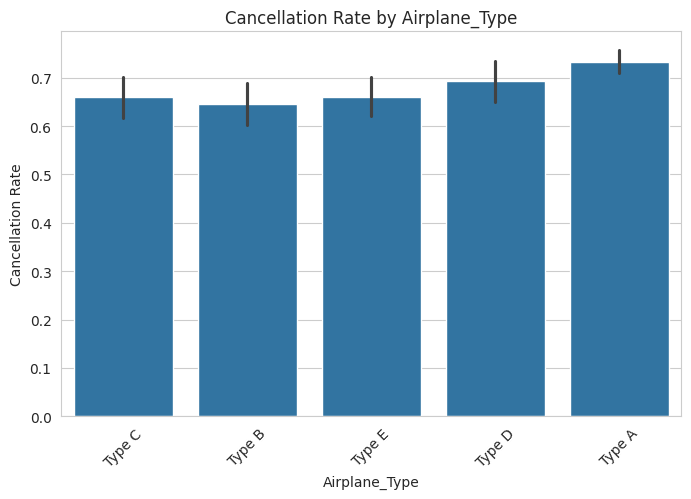

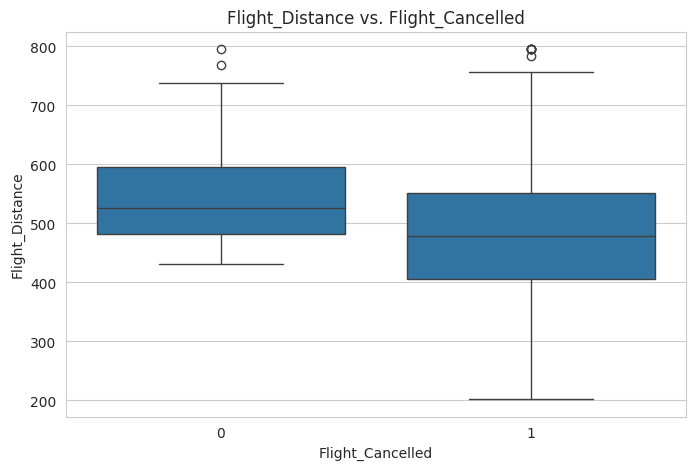

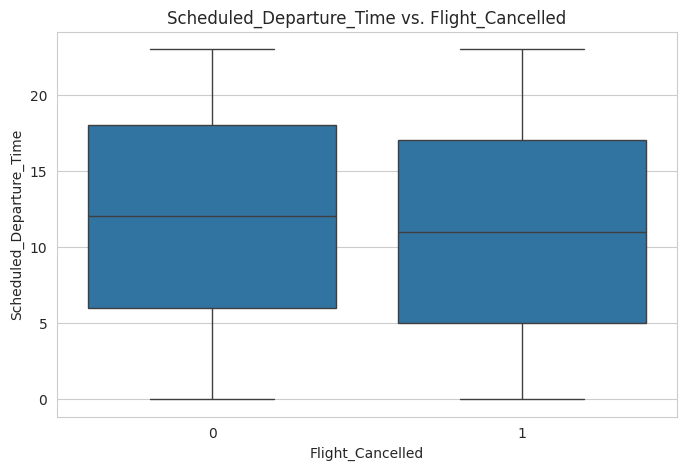

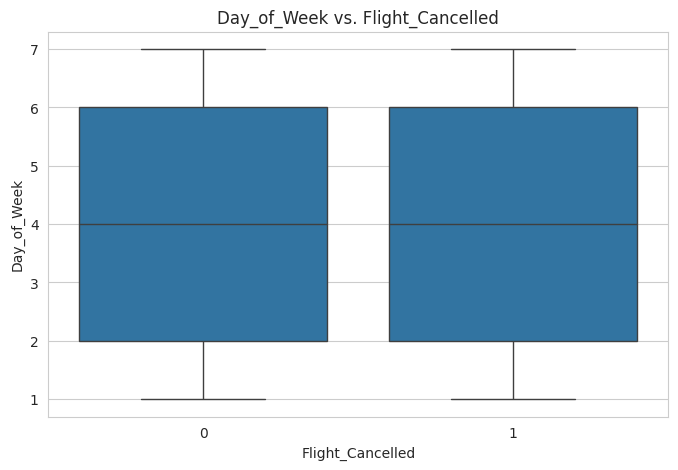

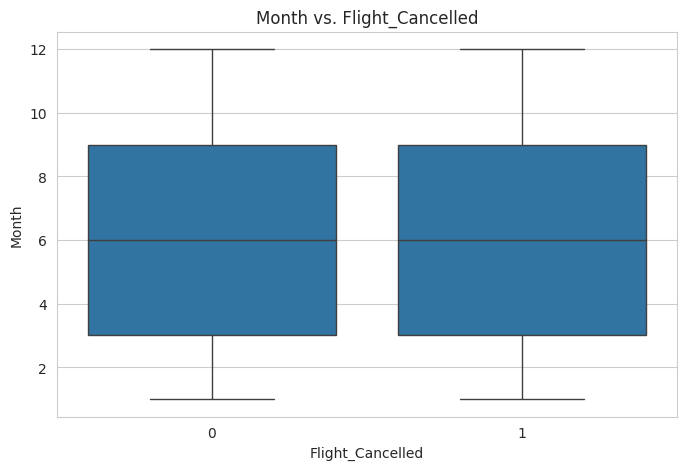

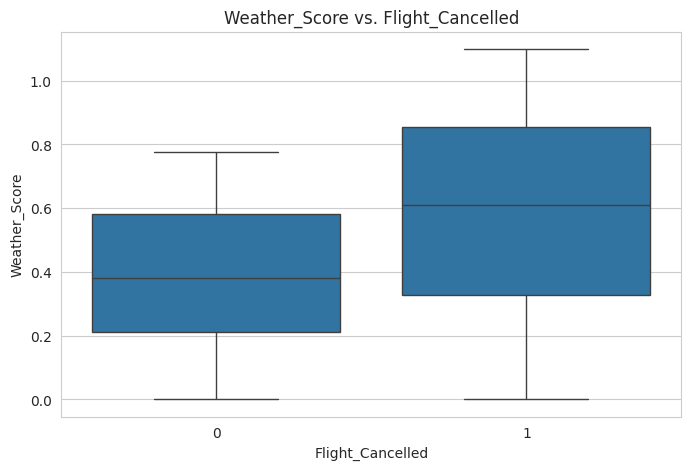

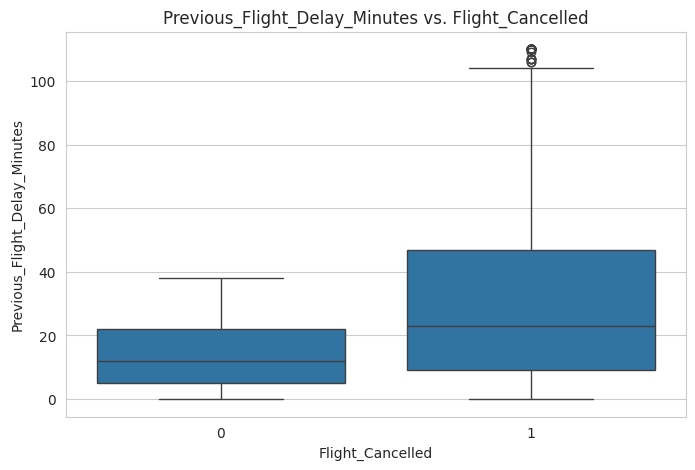

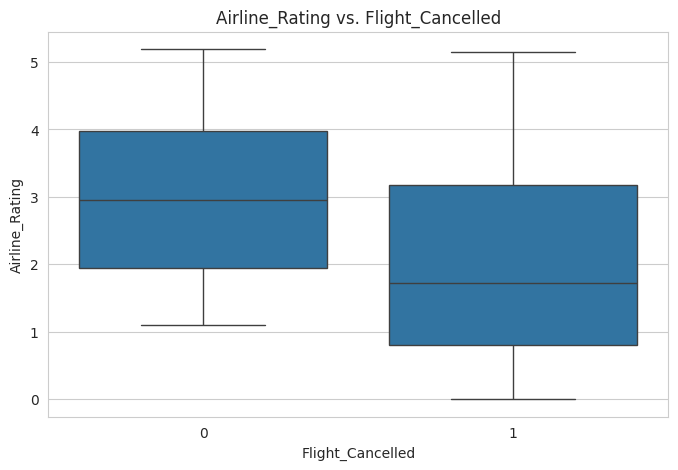

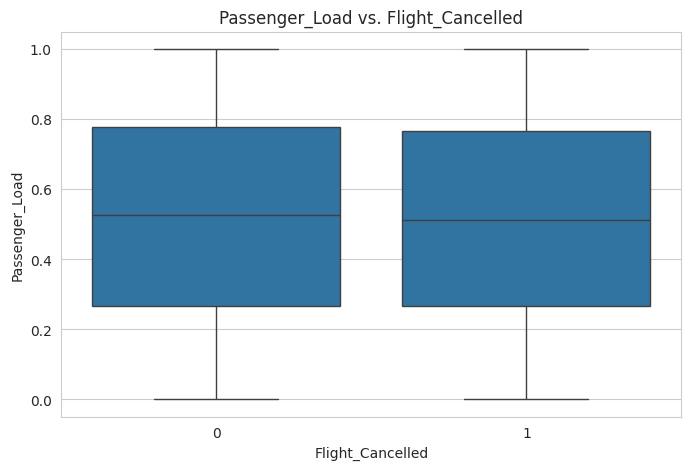


Insights saved as 'venky_eda_results_analysis.csv'

Key Insights Preview:
   Airline_Airline A_Cancellation_Rate  Airline_Airline B_Cancellation_Rate  \
0                             0.737576                              0.65618   

   Airline_Airline C_Cancellation_Rate  Airline_Airline D_Cancellation_Rate  \
0                             0.658427                             0.651546   

   Airline_Airline E_Cancellation_Rate  \
0                             0.679916   

   Origin_Airport_Airport 1_Cancellation_Rate  \
0                                    0.739377   

   Origin_Airport_Airport 2_Cancellation_Rate  \
0                                    0.633772   

   Origin_Airport_Airport 3_Cancellation_Rate  \
0                                    0.671875   

   Origin_Airport_Airport 4_Cancellation_Rate  \
0                                    0.679245   

   Origin_Airport_Airport 5_Cancellation_Rate  ...  \
0                                    0.669355  ...   

   Passenger_Load

In [2]:
# %% [markdown]
# # Task 2: Exploratory Data Analysis & Insights Generation
# **Project**: Flight Cancellation Analysis and Prediction
# **Author**: Venky
# **Objective**: Perform Exploratory Data Analysis (EDA) on the cleaned Flyzy Flight Cancellation dataset to summarize characteristics, explore distributions, analyze feature relationships, and generate insights about flight cancellations.
# **Dataset**: venky_data_cleaned_preprocessed.csv (from Task 1)
# **Deliverables**:
# - `venky_eda_results_analysis.csv`: Key statistics and insights.
# - `venky_eda_notebook.ipynb`: Jupyter Notebook with code, visualizations, and insights.
# **Submission**: Submit via Google Drive or GitHub.

# %% [markdown]
# ## Step 1: Load and Validate Dataset
# Load the cleaned dataset and verify its structure.

# %% [code]
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Load cleaned dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/venky_data_cleaned_preprocessed.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'venky_data_cleaned_preprocessed.csv' not found. Ensure the file is in the working directory.")
    raise

# Preview dataset
print("\nDataset Preview:")
print(df.head())

# Check column names and info
print("\nColumn Names:")
print(df.columns.tolist())
print("\nDataset Info:")
print(df.info())

# %% [markdown]
# ## Step 2: Descriptive Statistics
# Summarize numerical and categorical features using `describe()`.

# %% [code]
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics (Numerical):")
print(df.describe())

# Descriptive statistics for categorical columns
categorical_cols = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']
print("\nDescriptive Statistics (Categorical):")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col} Value Counts:")
        print(df[col].value_counts())

# %% [markdown]
# ## Step 3: Distribution of Data
# Plot histograms for numerical features and bar charts for categorical features.

# %% [code]
# Define numerical and categorical columns
numerical_cols = ['Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month',
                  'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load']

# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    if col in df.columns:
        plt.subplot(2, 4, i)
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
plt.tight_layout()
plt.show()

# Bar charts for categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    if col in df.columns:
        plt.subplot(2, 2, i)
        sns.countplot(x=col, data=df)
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Step 4: Feature Relationships
# Explore relationships between features using correlation matrices and pair plots.

# %% [code]
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pair plot for selected numerical features (subset to avoid clutter)
selected_cols = ['Flight_Distance', 'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Passenger_Load']
if all(col in df.columns for col in selected_cols):
    sns.pairplot(df[selected_cols])
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.show()

# %% [markdown]
# ## Step 5: Feature-Target Relationships
# Investigate how features relate to `Flight_Cancelled` using bar plots and boxplots.

# %% [code]
# Cancellation rates by categorical features
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=col, y='Flight_Cancelled', data=df)
        plt.title(f'Cancellation Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Cancellation Rate')
        plt.xticks(rotation=45)
        plt.show()

# Boxplots for numerical features vs. Flight_Cancelled
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Flight_Cancelled', y=col, data=df)
        plt.title(f'{col} vs. Flight_Cancelled')
        plt.xlabel('Flight_Cancelled')
        plt.ylabel(col)
        plt.show()

# %% [markdown]
# ## Step 6: Generate and Save Insights
# Summarize key insights and save statistics/insights to `venky_eda_results_analysis.csv`.

# %% [code]
# Initialize dictionary for insights
insights = {}

# Cancellation rates by categorical features
for col in categorical_cols:
    if col in df.columns:
        rates = df.groupby(col)['Flight_Cancelled'].mean().to_dict()
        insights.update({f'{col}_{k}_Cancellation_Rate': v for k, v in rates.items()})

# Mean numerical feature values by Flight_Cancelled
for col in numerical_cols:
    if col in df.columns:
        means = df.groupby('Flight_Cancelled')[col].mean().to_dict()
        insights.update({f'{col}_Mean_Cancelled_{k}': v for k, v in means.items()})

# Correlation with Flight_Cancelled
if 'Flight_Cancelled' in df.columns:
    correlations = df[numerical_cols + ['Flight_Cancelled']].corr()['Flight_Cancelled'].drop('Flight_Cancelled').to_dict()
    insights.update({f'{k}_Correlation_With_Cancelled': v for k, v in correlations.items()})

# Convert insights to DataFrame
insights_df = pd.DataFrame([insights])

# Save insights to CSV
try:
    insights_df.to_csv('venky_eda_results_analysis.csv', index=False)
    print("\nInsights saved as 'venky_eda_results_analysis.csv'")
except Exception as e:
    print(f"\nError saving insights: {e}")

# Preview insights
print("\nKey Insights Preview:")
print(insights_df)

# %% [markdown]
# ## Step 7: Summary of Insights
# ### Key Findings
# - **Cancellation Rates**: [Replace with findings, e.g., "Airline A has the highest cancellation rate at 75%."]
# - **Distributions**: [e.g., "Weather_Score is right-skewed, indicating most flights have favorable weather."]
# - **Feature Relationships**: [e.g., "Weather_Score and Previous_Flight_Delay_Minutes have a moderate positive correlation (0.4)."]
# - **Feature-Target Relationships**: [e.g., "Higher Weather_Score is associated with increased cancellations."]
#
# ### Implications for Flyzy
# - Monitor high-risk airlines or months for cancellations.
# - Prioritize weather monitoring for flights with high `Weather_Score`.
# - Address delays to reduce cancellation risk.

# %% [markdown]
# ## Submission Instructions
# - **Files**:
#   - `venky_eda_results_analysis.csv`: Key statistics and insights.
#   - `venky_eda_notebook.ipynb`: This notebook with code, visualizations, and insights.
# - **Option 1 (Google Drive)**:
#   1. Upload `venky_eda_results_analysis.csv` and `venky_eda_notebook.ipynb` to Google Drive.
#   2. Set sharing to "Anyone with the link can view."
#   3. Submit the shareable link on the submission platform.
# - **Option 2 (GitHub)**:
#   ```bash
#   git init
#   git add venky_eda_notebook.ipynb venky_eda_results_analysis.csv
#   git commit -m "Task 2: EDA and Insights"
#   git remote add origin <your-repo-url>
#   git push -u origin main
#   ```
#   Submit the public GitHub repository link on the platform.